In [5]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset split
output_base_path_aksarawi = r'D:\Proyek Aksara 2\Datasets_split_aksarawi'

# Memuat MobileNet sebagai model dasar (tanpa lapisan klasifikasi)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense untuk klasifikasi
predictions = Dense(29, activation='softmax')(x)  # 20 output classes

# Menggabungkan model dasar MobileNet dengan lapisan klasifikasi yang baru
model = Model(inputs=base_model.input, outputs=predictions)

# Menyatakan bahwa lapisan dasar MobileNet tidak akan dilatih
for layer in base_model.layers:
    layer.trainable = False

# Compile model dengan optimizer Adam dan loss function categorical crossentropy
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 64, 64, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 64, 64, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 32, 32, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 32, 32, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 32, 32, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 32, 32, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,258,589 (12.43 MB)

 Trainable params: 29,725 (116.11 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [6]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksarawi, 'train')
test_dir = os.path.join(output_base_path_aksarawi, 'test')

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 986 images belonging to 29 classes.
Found 464 images belonging to 29 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 986ms/step - accuracy: 0.1257 - loss: 3.4106 - val_accuracy: 0.5560 - val_loss: 1.8792
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.6250 - loss: 1.6632 - val_accuracy: 0.8534 - val_loss: 1.0033
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 511ms/step - accuracy: 0.8210 - loss: 0.9663 - val_accuracy: 0.8966 - val_loss: 0.6645
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.8817 - loss: 0.6672 - val_accuracy: 0.9375 - val_loss: 0.4903
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 578ms/step - accuracy: 0.8907 - loss: 0.5450 - val_accuracy: 0.9418 - val_loss: 0.3941
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 518ms/step - accuracy: 0.9177 - loss: 0.4717 - val_accuracy: 0.9569 - val_loss: 0.3297
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 480ms/step - accuracy: 0.9253 - loss: 0.3766 - val_accuracy: 0.9569 - val_loss: 0.2956
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 549ms/step - accuracy: 0.9442 - loss: 0.3048 - val_accu

In [8]:
final_accuracy = history.history['val_accuracy'][-1]
print(f'Akurasi akhir model: {final_accuracy}')


Akurasi akhir model: 0.9784482717514038


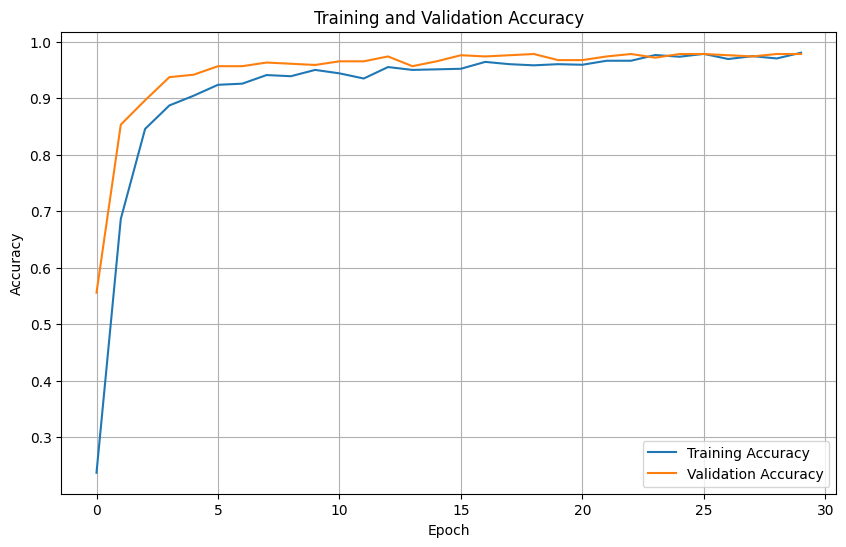

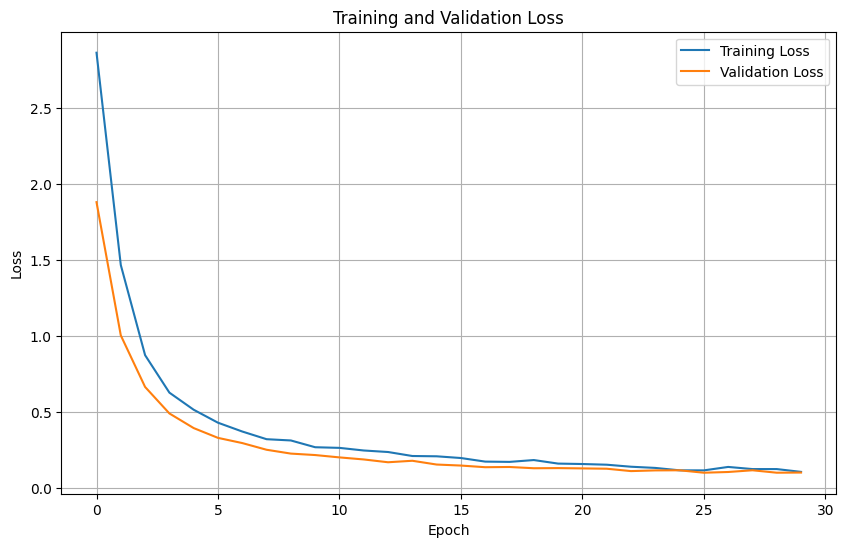

In [9]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# # Save the model
model.save('aksaraJawiMobileNet_classifier_model.h5')

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Load the model
model = load_model('D:\\Proyek Aksara 2\\Model Aksarawi\\aksaraJawiMobileNet_classifier_model.h5')

# Class labels
class_labels =  ['A (alif)', 'B (ba)', 'C (ca)', 'D (dad [dOd])', 'D (dal)', 'F (fa)', 
                    'G (ga)', 'GH (gain)', 'H (ha)', 'J (jim)', 'K (kaf)', 'KH (kha)', 
                    'L (lam)', 'M (mim)', 'N (nun)', 'NG (nga)', 'NY (nya)', 'P (pa)', 
                    'R (ra,rO)', 'S (sAD [sOD])', 'S (sin)', 'S, th (tsa) [tha]', 'SY (syin)', 
                    'T (ta)', 'T,H (ta marbutah)', 'V (va)', 'W, U, O (wau)', 'Y akhir (ye)', 
                    'Y,I,E (ya)', 'Z (dah) [dhal]']

# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debug: Print raw predictions
    predicted_class_idx = np.argmax(predictions)
    print(f"Predicted class index: {predicted_class_idx}")  # Debug: Print predicted class index
    predicted_class = class_labels[predicted_class_idx]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        print(f"Uploaded file: {uploaded_file}")  # Debug: Print uploaded file information
        content = uploaded_file['content']  # Access the content directly
        
        try:
            # Convert content to image array
            img = load_img(io.BytesIO(content), target_size=(128, 128))
            img_array = img_to_array(img)
            
            # Classify the uploaded image
            predicted_class = classify_image(img_array)
            
            # Display the uploaded image and classification result
            display_img = Image(value=content, format='png', width=300, height=300)
            result_label = Label(f'Classified as: {predicted_class}')
            display(VBox([display_img, result_label]))
        
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))
